# Haberman Cancer Survival Dataset

Haberman Dataset: https://www.kaggle.com/gilsousa/habermans-survival-data-set

* The Haberman's dataset contains cases from a study that was conducted between
1958 and 1970 at the University of Chicago's Billings Hospital on
the survival of patients who had undergone surgery for breast
cancer.



### Attribute Information:

* Age of patient at time of operation (numerical)
* Patient's year of operation (year - 1900, numerical)
* Number of positive axillary nodes detected (numerical)
* Survival status (class attribute) 
    
    1 = the patient survived 5 years or longer 
    
    2 = the patient died within 5 year

### Objective: 

Classify the model based on survival of patients.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset into pandas dataframe
haberman = pd.read_csv(r"C:\Users\SVF\Downloads\IPYNB\AAIC Assignments\4. EDA on Haberman Dataset\haberman.csv")

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# (Q) how many data-points and features?
print(haberman.shape)

(306, 4)


* This dataset contains 306 rows and 4 coloums.

In [4]:
# (Q) What are the column names in the dataset?
print(haberman.columns)

Index(['Age', 'Operation_Year', 'Axilliary_Nodes', 'Survival_Status'], dtype='object')


In [5]:
haberman.tail()

,Age,Operation_Year,Axilliary_Nodes,Survival_Status
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


In [6]:
# Checking for possible nulls in the dataset
haberman.isnull().sum()

Age                0
Operation_Year     0
Axilliary_Nodes    0
Survival_Status    0
dtype: int64

In [7]:
#(Q) How many data points for each class are present?
haberman["Survival_Status"].value_counts()
# Haberman is imbalanced dataset as number of datapoints for one class is 225 and 81 for another class

1    225
2     81
Name: Survival_Status, dtype: int64

In [8]:
haberman.describe()

,Age,Operation_Year,Axilliary_Nodes,Survival_Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


##### Observations:
* Age of the patients is between (30-83) years with an average age of 52 years 
* The dataset has been made during time period of (58-69). i.e 12 years of data
* The Positive axilliary nodes is between (0-52).But looking at the 75% and the max, there may be chances of data corruption.
* The survival status has only two values as 1 and 2

# 2-D Scatter Plot

<function matplotlib.pyplot.show(*args, **kw)>

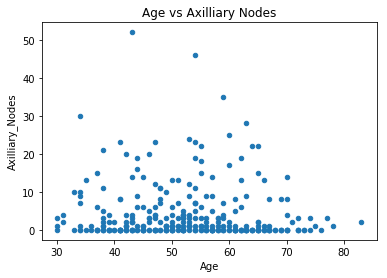

In [9]:
haberman.plot(kind = 'scatter', x = 'Age', y = 'Axilliary_Nodes') 

plt.title("Age vs Axilliary Nodes")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

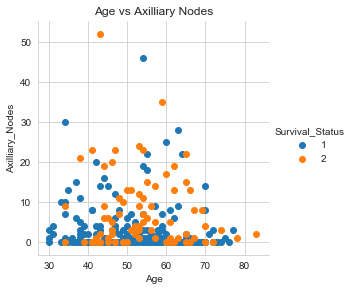

In [10]:
# 2-D Scatter plot with color-coding
sns.set_style("whitegrid")
sns.FacetGrid(haberman, hue = 'Survival_Status', size = 4) \
   .map(plt.scatter, 'Age', 'Axilliary_Nodes') \
   .add_legend()

plt.title('Age vs Axilliary Nodes')
plt.show

#  Pair-Plot

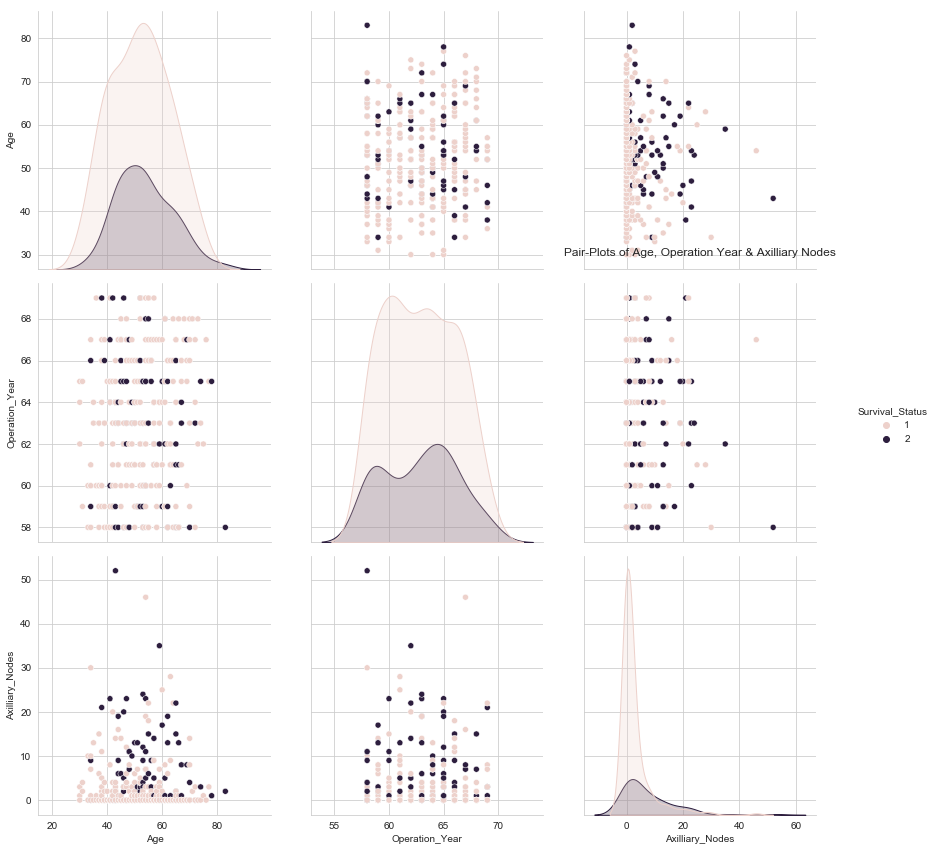

In [11]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(haberman, hue ="Survival_Status", vars = ["Age", "Operation_Year", "Axilliary_Nodes"], size=4)

plt.title('Pair-Plots of Age, Operation Year & Axilliary Nodes', loc = 'center', pad = '300')
plt.show()
# NOTE: The diagnol elements are PDFs for each feature.

#### Observation:
* By observing the plot, we are not able to seperate the survival category.But looking at the age vs axilliary nodes, it is      showing better classification.

# 1-D Scatter Plot

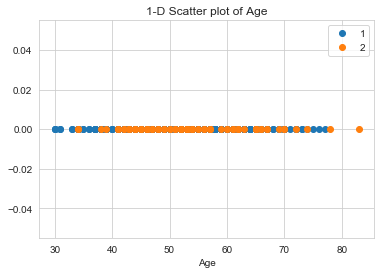

In [12]:
# 1-D scatter plot using only 1 feature 
import numpy as np

Alive = haberman[haberman["Survival_Status"] == 1]
Dead  = haberman[haberman["Survival_Status"] == 2]

plt.plot(Alive["Age"], np.zeros(len(Alive)),'o')
plt.plot(Dead["Age"], np.zeros(len(Dead)),'o')

plt.xlabel("Age")
plt.title('1-D Scatter plot of Age')
plt.legend(['1', '2'])
plt.show()

#### Observation:
* Very hard to classify as most of the points are overlapped.

# Histogram, Probability Density Function(PDF):

<function matplotlib.pyplot.show(*args, **kw)>

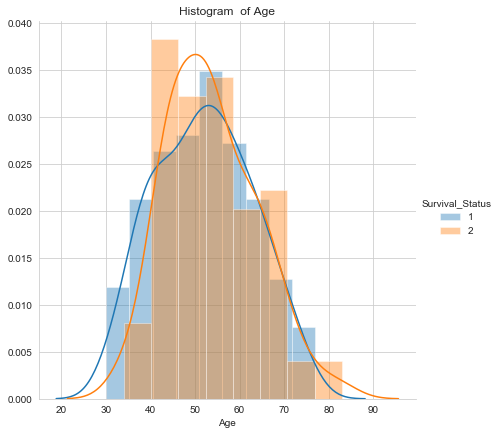

In [13]:
sns.FacetGrid(haberman, hue = "Survival_Status", size = 6) \
   .map(sns.distplot, "Age") \
   .add_legend()

plt.title("Histogram  of Age")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

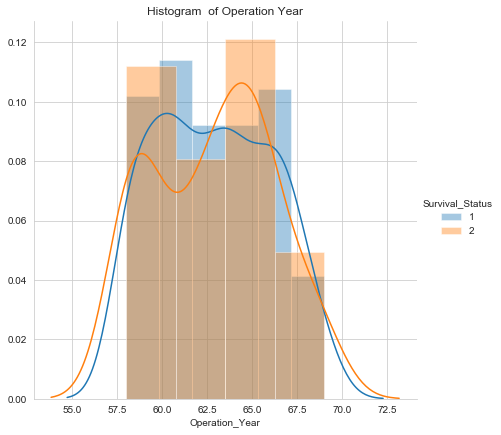

In [14]:
plt.close()

sns.FacetGrid(haberman, hue = "Survival_Status", size = 6) \
   .map(sns.distplot, "Operation_Year") \
   .add_legend()

plt.title("Histogram  of Operation Year")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

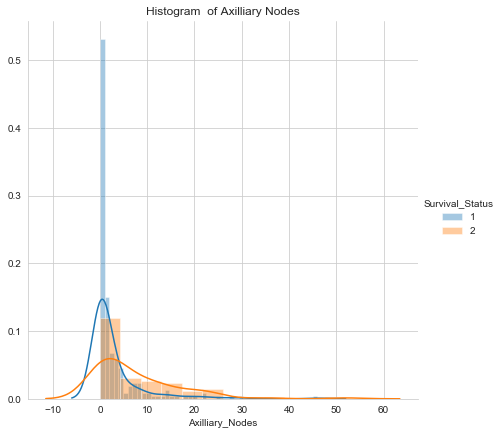

In [15]:
plt.close()

sns.FacetGrid(haberman, hue = "Survival_Status", size = 6) \
   .map(sns.distplot, "Axilliary_Nodes") \
   .add_legend()

plt.title("Histogram  of Axilliary Nodes")
plt.show

#### Observation:
* PDF of Age and Operation Year doesn't provide much information but after looking at PDF of Auxilliary Nodes,We can definately say that the chances of surviving is higher if the Auxilliary Nodes value is between 0-3

# Cumulative Distribution Function(CDF):

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


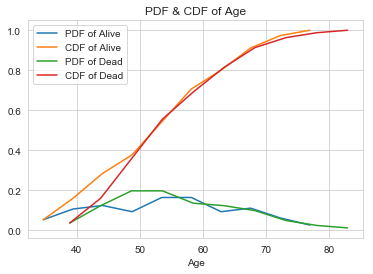

In [20]:
# Plot CDF for both Alive and Dead

counts, bin_edges = np.histogram(Alive['Age'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(Dead['Age'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.xlabel('Age')
plt.title('PDF & CDF of Age')
plt.legend(['PDF of Alive','CDF of Alive','PDF of Dead','CDF of Dead'])
plt.show() 

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


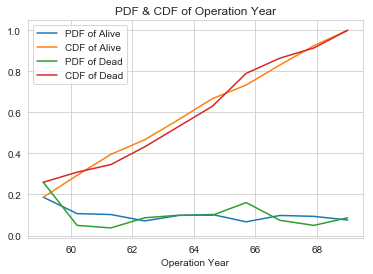

In [21]:
counts, bin_edges = np.histogram(Alive['Operation_Year'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(Dead['Operation_Year'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.xlabel('Operation Year')
plt.title('PDF & CDF of Operation Year')
plt.legend(['PDF of Alive','CDF of Alive','PDF of Dead','CDF of Dead'])
plt.show() 

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


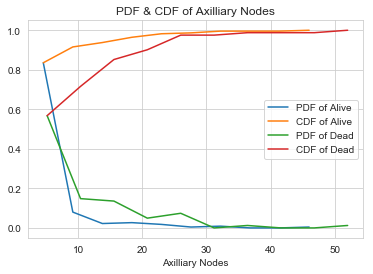

In [22]:
counts, bin_edges = np.histogram(Alive['Axilliary_Nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(Dead['Axilliary_Nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.xlabel('Axilliary Nodes')
plt.title('PDF & CDF of Axilliary Nodes')
plt.legend(['PDF of Alive','CDF of Alive','PDF of Dead','CDF of Dead'])
plt.show() 

#  Mean, Variance and Standard Deviation

In [23]:
print("Patients who survived more than 5 years: ")
Alive.describe()

Patients who survived more than 5 years: 


,Age,Operation_Year,Axilliary_Nodes,Survival_Status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [24]:
print("Patients who survived less than 5 years: ")
Dead.describe()

Patients who survived less than 5 years: 


,Age,Operation_Year,Axilliary_Nodes,Survival_Status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


# Median, Percentile, Quantile, IQR, MAD

In [25]:
print('Medians: ')
print(np.median(Alive['Axilliary_Nodes']))
print(np.median(Dead['Axilliary_Nodes']))

print('\nQuantiles: ')
print(np.percentile(Alive['Axilliary_Nodes'],np.arange(25, 100, 25)))
print(np.percentile(Dead['Axilliary_Nodes'],np.arange(25, 100, 25)))

print('\n90th Percentiles: ')
print(np.percentile(Alive['Axilliary_Nodes'],90))
print(np.percentile(Dead['Axilliary_Nodes'],90))

from statsmodels import robust
print('\nMedian Absolute Deviation: ')
print(robust.mad(Alive['Axilliary_Nodes']))
print(robust.mad(Dead['Axilliary_Nodes']))

Medians: 
0.0
4.0

Quantiles: 
[0. 0. 3.]
[ 1.  4. 11.]

90th Percentiles: 
8.0
20.0

Median Absolute Deviation: 
0.0
5.930408874022408


# Box-Plot and Whiskers

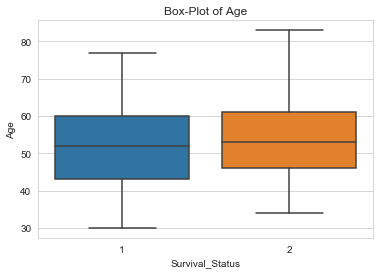

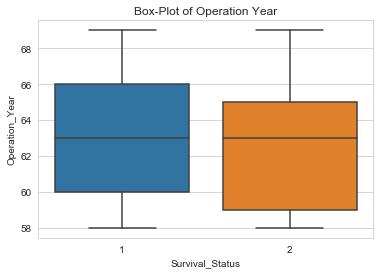

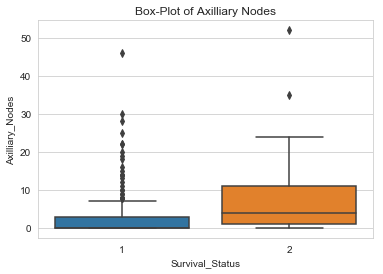

In [26]:
# Another method of visualizing the 1-D scatter plot

sns.boxplot(x ='Survival_Status', y = 'Age', data = haberman)
plt.title('Box-Plot of Age')
plt.show()

sns.boxplot(x ='Survival_Status', y = 'Operation_Year', data = haberman)
plt.title('Box-Plot of Operation Year')
plt.show()

sns.boxplot(x ='Survival_Status', y = 'Axilliary_Nodes', data = haberman)
plt.title('Box-Plot of Axilliary Nodes')
plt.show()

# Violin Plot

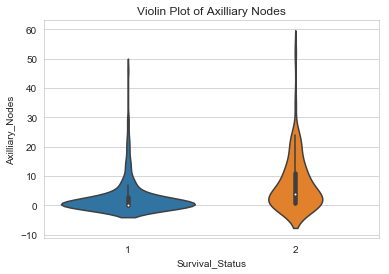

In [27]:
# Violin plot combines the benefits of histogram and box-plot
# Denser regions of the data are fatter, and sparser ones thinner in a violin plot

sns.violinplot(x = 'Survival_Status', y = 'Axilliary_Nodes', data = haberman, size = 9)
plt.title('Violin Plot of Axilliary Nodes')
plt.show()

# Contour Plot

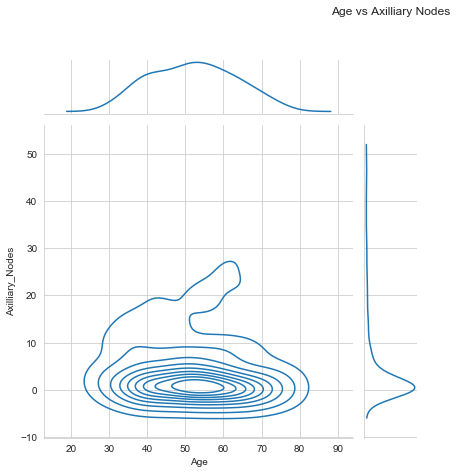

In [28]:
# 2D Density plot
sns.jointplot(x = 'Age', y = 'Axilliary_Nodes', data = Alive, kind = 'kde')
plt.title('Age vs Axilliary Nodes', loc = 'center', pad = '110')
plt.show()

## Final Observations/Results:

We can build a model based on the observations using following conditions for the chances of Survival and Non-Survival. 

##### Survival:
* Age less than 60 years.
* Patients who treated after 1966.
* Axilliary nodes less than 3.
   

#### Non-Survival:
* Age more than 60 years.
* Patients who treated before 1966.
* Axilliary nodes more than 3.